In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [11]:
df = pd.read_csv("glicose_data.csv")

df = df.drop(columns=["Unnamed: 20", "Unnamed: 21"], errors="ignore")

cols = ["GLICEMIA", "SONO", "KCAL", "CARB", "padel"]
df2 = df[cols].copy().dropna()

for col in ["KCAL", "CARB", "GLICEMIA"]:
    if df2[col].dtype == object:
        df2[col] = df2[col].astype(str).str.strip().str.capitalize()

map_kcal_carb = {"Abaixo": 0, "Recomendado": 1, "Acima": 2}
df2["KCAL"] = df2["KCAL"].map(map_kcal_carb)
df2["CARB"] = df2["CARB"].map(map_kcal_carb)

map_glicemia = {"Abaixo": 0, "Ideal": 1, "Acima": 2}
df2["GLICEMIA"] = df2["GLICEMIA"].map(map_glicemia)

df2 = df2.dropna(subset=["GLICEMIA", "KCAL", "CARB", "SONO", "padel"])

X = df2[["SONO", "KCAL", "CARB", "padel"]].astype(float)
y = df2["GLICEMIA"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)
labels_present = np.sort(unique_labels(y_test, y_pred))
label_name_map = {0: "Abaixo", 1: "Ideal", 2: "Acima"}
target_names = [label_name_map[i] for i in labels_present]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Acurácia: 0.8571

Relatório de Classificação:

              precision    recall  f1-score   support

      Abaixo       0.00      0.00      0.00         5
       Acima       0.86      1.00      0.92        30

    accuracy                           0.86        35
   macro avg       0.43      0.50      0.46        35
weighted avg       0.73      0.86      0.79        35



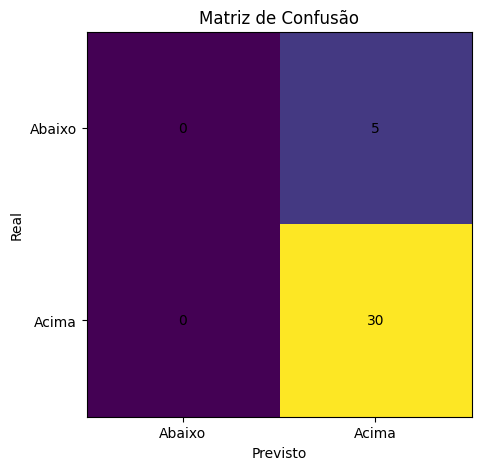

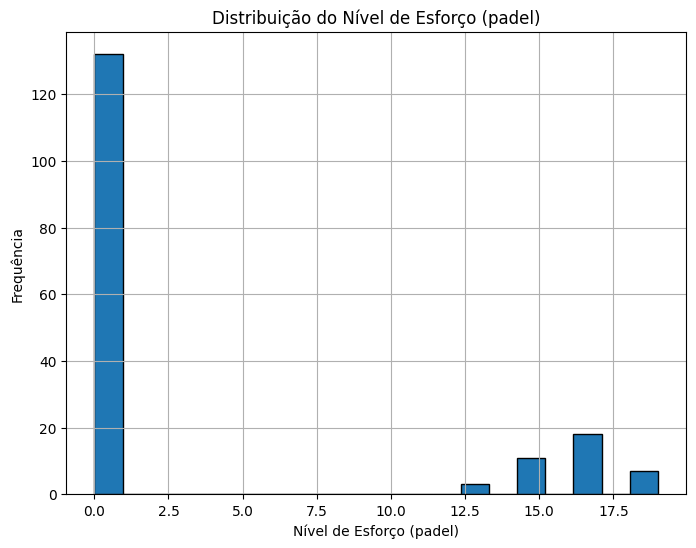

In [12]:
print(f"Acurácia: {acc:.4f}\n")
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred,
                            labels=labels_present,
                            target_names=target_names,
                            zero_division=0))

cm = confusion_matrix(y_test, y_pred, labels=labels_present)

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df2["padel"].astype(float), bins=20, edgecolor="black")
plt.title("Distribuição do Nível de Esforço (padel)")
plt.xlabel("Nível de Esforço (padel)")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()